In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import logit

In [2]:
# Task 1.

In [3]:
aineisto = pd.read_csv("C:/Users/testi/Desktop/excel_files/HealthData.csv", index_col=0)

In [4]:
aineisto.head()

,ID,Height,Weight,Syst1,Diast1,Syst2,Diast2,Sex,Mstatus,Income,VaricoseVenes,BMI,Age,Hstatus
1,5513,170,80.5,164,92,156,92,1,1,3,1,27.854671,60,2
2,5521,163,59.6,132,72,126,68,2,1,6,1,22.432158,36,1
3,5590,158,60.0,120,70,120,72,2,1,3,1,24.034610,37,1
4,5646,158,57.4,118,66,120,72,2,1,4,1,22.993110,41,1
5,5658,165,73.5,170,74,166,80,1,2,1,1,26.997245,42,2


In [5]:
aineisto["Hstatus"].value_counts()

1    257
2    173
3     43
Name: Hstatus, dtype: int64

In [6]:
aineisto["HBad"] = np.where(aineisto["Hstatus"] == 3, 1, 0)

In [7]:
aineisto["HBad"].value_counts()

0    430
1     43
Name: HBad, dtype: int64

In [8]:
health = aineisto[["HBad", "Age", "Sex", "Mstatus"]].copy()

In [9]:
health.head()

,HBad,Age,Sex,Mstatus
1,0,60,1,1
2,0,36,2,1
3,0,37,2,1
4,0,41,2,1
5,0,42,1,2


In [10]:
health.dtypes

HBad       int32
Age        int64
Sex        int64
Mstatus    int64
dtype: object

In [11]:
l = ["Mstatus"]

for i in l:
    health[i] = health[i].astype("category")

In [12]:
health.dtypes

HBad          int32
Age           int64
Sex           int64
Mstatus    category
dtype: object

In [13]:
# Task 2.

In [14]:
health["Age40"] = health["Age"] - 40

In [15]:
health.head()

,HBad,Age,Sex,Mstatus,Age40
1,0,60,1,1,20
2,0,36,2,1,-4
3,0,37,2,1,-3
4,0,41,2,1,1
5,0,42,1,2,2


In [16]:
model1 = logit("HBad ~ Age40", data=health).fit()

Optimization terminated successfully.
         Current function value: 0.271738
         Iterations 7


In [17]:
model1.params

Intercept   -2.995607
Age40        0.086084
dtype: float64

$ logit(\pi_{HBad}) = \beta_0 + \beta_1 * Age40 $

In [18]:
# Task 3.

In [19]:
# Let's make a function to calculate probabilities.

In [20]:
def invlogit(x):
    e = np.exp(x) / (1 + np.exp(x))
    return e

In [21]:
b = model1.params

In [22]:
invlogit(b[0] + b[1] * 40)

# The probability of being in bad health status at age 40.

0.6101051031487589

In [23]:
invlogit(b[0] + b[1] * 50)

# The probability of being in bad health status at age 50.

0.787277828288247

In [24]:
# Task 4.

In [25]:
max(invlogit(b[0] + b[1] * health["Age40"] + 1) - invlogit(b[0] + b[1] * health["Age40"]))

# Maximum difference in probability of bad health status when age differs by one year.

0.23458731485200274

In [26]:
max(invlogit(b[0] + b[1] * health["Age40"] + 10) - invlogit(b[0] + b[1] * health["Age40"]))

# Maximum difference in probability of bad health status when age differs by ten years.

0.9866103735217656

In [27]:
# Task 5.

In [28]:
age_unique = np.unique(health["Age40"].values)
age_unique_df = pd.DataFrame({"Age40": age_unique})

In [29]:
pred = model1.predict(age_unique_df)

In [30]:
pd.set_option("display.max_rows", None)
table = health["Age"].groupby(health["HBad"]).value_counts().sort_index()

In [31]:
suhtfrek = (table[1] / (table[1]  + table[0])).fillna(0)
suhtfrek

Age
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.333333
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.090909
33    0.111111
34    0.000000
35    0.052632
36    0.000000
37    0.071429
38    0.000000
39    0.000000
40    0.000000
41    0.125000
42    0.000000
43    0.000000
44    0.000000
45    0.117647
46    0.000000
47    0.000000
48    0.133333
49    0.090909
50    0.083333
51    0.076923
52    0.166667
53    0.000000
54    0.125000
55    0.181818
56    0.000000
57    0.285714
58    0.333333
59    0.352941
60    0.000000
61    0.250000
62    0.000000
63    0.375000
64    0.250000
Name: Age, dtype: float64

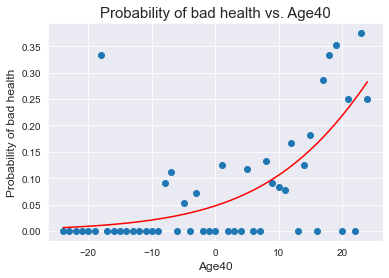

In [32]:
sns.set_style("darkgrid")
plt.scatter(age_unique, suhtfrek)
plt.plot(age_unique, pred, color="red")
plt.title("Probability of bad health vs. Age40", size=15)
plt.xlabel("Age40", size=12)
plt.ylabel("Probability of bad health", size=12);

In [33]:
# Task 6.

In [34]:
invlogit(b[0] + b[1] * (20+10)) - invlogit(b[0] + b[1] * (20))

# The predicted difference for having a bad health at the age 30 vs. 20 is approx. 18 %.

0.17958648570402322

In [35]:
invlogit(b[0] + b[1] * (30+10)) - invlogit(b[0] + b[1] * (30))

# The predicted difference for having bad health at the age 40 vs. 30 is approx. 21.2 %.

0.2119327591464794

In [36]:
invlogit(b[0] + b[1] * (40+10)) - invlogit(b[0] + b[1] * (40))

# The predicted difference for having bad health at the age 50 vs. 40 is approx. 17.7 %.

0.17717272513948812

In [37]:
invlogit(b[0] + b[1] * (50+10)) - invlogit(b[0] + b[1] * (50))

# The predicted difference for having bad health at the age 50 vs. 40 is approx. 11 %.

0.11019311157117906

In [38]:
# Task 7.

In [39]:
# In logistic regression, we can interpret our model's coefficients with probabilities or odds.
# Let's interpret our model coefficients using the odds.

In [40]:
odds = np.exp(b[0])
odds

# The intercept term b_0 gets a interpretation by setting the predictor variable Age40 to zero.
# This cancels the b_1 * Age40 term, leaving just the b_0 term.
# This gives us an odds value of 0.05.

# The interpretation for odds itself is: probability of getting x / probability of not getting x
# or P(x) / (1 - P(x)).

0.050006272435088366

In [41]:
np.exp(b[1])

# The interpretation of the slope term b_1:
# When comparing two people, who's age differ by one year, then the person who is one year older \
# is 1.09 times more likely to have a bad health status than the person who is one year younger.
# If this value would be exactly one, then the two people would have exactly the same odds of having \
# a bad health status.

1.0898978995253343

In [42]:
# Task 8.

In [43]:
model2 = logit("HBad ~ Age40 + Sex + Mstatus", data=health).fit()
model2.params

Optimization terminated successfully.
         Current function value: 0.265326
         Iterations 7


Intercept      -2.340376
Mstatus[T.2]    0.685021
Mstatus[T.3]    0.437117
Mstatus[T.4]   -0.488341
Age40           0.099724
Sex            -0.611334
dtype: float64

$ logit(\pi_{HBad}) = \beta_0 + \beta_1 * Age40 + \beta_2 * Sex + \beta_3 * Mstatus $

In [44]:
# Task 9.

In [45]:
x1 = pd.DataFrame({"Age40": [45],
                   "Sex": [2],
                   "Mstatus": [1]})

x2 = pd.DataFrame({"Age40": [60],
                   "Sex": [1],
                   "Mstatus": [3]})
print(x1)
print(x2)

   Age40  Sex  Mstatus
0     45    2        1
   Age40  Sex  Mstatus
0     60    1        3


In [46]:
pred_x1 = model2.predict(x1)
pred_x1

# The probability for a bad health status when one is 45 years old, female, and in relationship.

0    0.715968
dtype: float64

In [47]:
pred_x2 = model2.predict(x2)
pred_x2

# The probability for a bad health status when one is 60 years old, male, and seperated.

0    0.969789
dtype: float64

In [48]:
# Task 11.

In [50]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   HBad   No. Observations:                  473
Model:                          Logit   Df Residuals:                      467
Method:                           MLE   Df Model:                            5
Date:                Sat, 08 Oct 2022   Pseudo R-squ.:                  0.1290
Time:                        18:18:27   Log-Likelihood:                -125.50
converged:                       True   LL-Null:                       -144.09
Covariance Type:            nonrobust   LLR p-value:                 5.493e-07
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.3404      0.542     -4.316      0.000      -3.403      -1.278
Mstatus[T.2]     0.6850      0.514      1.332      0.183      -0.323       1.693
Mstatus[T.3]     0.4371      0.678      0.645      0.519      -0.891       1.765
Mstatus[T.4]    -0.4883      0.670     -0.729      0.466      -1.802       0.825
Age40            0.0997      0.019      5.185      0.000       0.062       0.137
Sex             -0.6113      0.353     -1.732      0.083      -1.303       0.080
================================================================================
"""

In [ ]:
# 1. standard error
# 2. Log-Likelihood
# 3. Method
# 4. Covariance Type